In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [7]:
dataset_train=pd.read_csv('titanic_train.csv')

In [8]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# data analysis and cleaning data

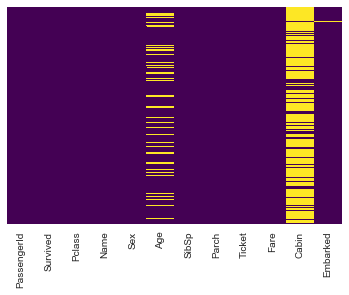

In [11]:
sns.heatmap(dataset_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
 #yellow values above shows null value in the dataset

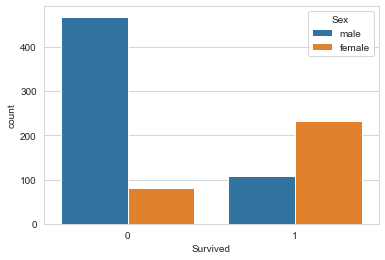

In [15]:
sns.countplot(x='Survived',data=dataset_train,hue='Sex')

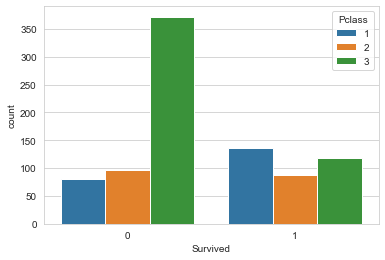

In [17]:
sns.countplot(x='Survived',data=dataset_train,hue='Pclass')

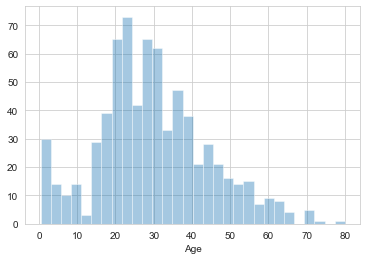

In [18]:
sns.distplot(dataset_train['Age'].dropna(),kde=False,bins=30)

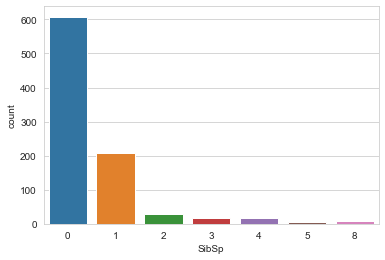

In [19]:
sns.countplot(x='SibSp',data=dataset_train)

In [24]:
#dataset_train['Fare'].hist(bins=40,figsize=(10,4))

import cufflinks as cf
cf.go_offline()
dataset_train['Fare'].iplot(kind='hist',bins=50)

In [54]:
#filling Null age values with average age on the basis of class

In [25]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    
    else:
        return Age
   


In [26]:
dataset_train['Age']=dataset_train[['Age','Pclass']].apply(impute_age,axis=1)

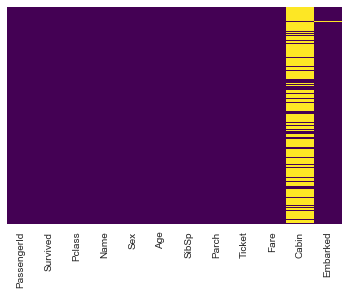

In [27]:
sns.heatmap(dataset_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
#dropping the cabin dataset

In [28]:
dataset_train.drop('Cabin',axis=1,inplace=True)

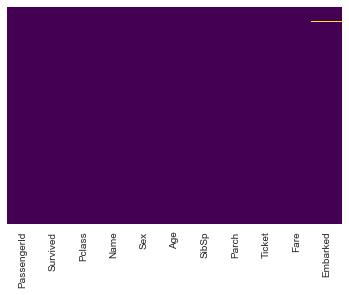

In [29]:
sns.heatmap(dataset_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
dataset_train.dropna(inplace=True)

In [56]:
#using categorical data with dummy values

In [31]:
Sex=pd.get_dummies(dataset_train['Sex'],drop_first=True)

In [32]:
embarked=pd.get_dummies(dataset_train['Embarked'],drop_first=True)

In [33]:
dataset_train=pd.concat([dataset_train,Sex,embarked],axis=1)

In [34]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [37]:
dataset_train.drop(['Embarked','Name','Sex','Ticket'],axis=1,inplace=True)

In [40]:
dataset_train.drop('PassengerId',axis=1,inplace=True)

In [41]:
dataset_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Training the model

In [42]:
X=dataset_train.drop('Survived',axis=1)
y=dataset_train['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel=LogisticRegression()

In [49]:
logmodel.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions=logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

[[148  15]
 [ 36  68]]
